# What is testing data cleaning

After a dataset has been cleaned, it's important to reassess the dataset to confirm the success of the data cleaning operation. After a certain issues has been cleaned, it should be followed by a test before resolving the next issue. This follows the test-drived development concept in QA. 

The difference between data assessment and data testing is:

* in data assessment, the assessment is usually flexiable in order to be able to be vigilant of different types of data issues. Like when looking for missing data, it was found that not only NaN represent missing data, but also '#' and '*' do as well.

* In data testing, it is already known what the exact issues are and can be targetted with specific test cases, since the issues are already known. The test cases' purpose is to ensure that the issues have been resolved correctly.

# Import Libraries

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.mode.chained_assignment = None
%config InlineBackend.figure_format = "retina"

# Load Datasets

In [24]:
orig_pums = pd.read_json('./2021-pums.json')
orig_wage_df = pd.read_excel('./oes_research_2021_sec_55-56.xlsx')

In [25]:
orig_pums.head()

0    1    2       3   4
0  PWGTP  WRK  SEX    SOCP  ST
1    208    0    1  119111  06
2     88    1    2  119151  06
3     55    2    1  119111  06
4     87    1    2  113121  06

# Code for Cleaning the `PUMS` dataset

## Making copies of the dataframes

In [46]:
cleaned_pums = orig_pums.copy()

## Defining the 0th row as the header

In [47]:
cleaned_pums.columns = cleaned_pums.iloc[0]

In [48]:
cleaned_pums.head()

0  PWGTP  WRK  SEX    SOCP  ST
0  PWGTP  WRK  SEX    SOCP  ST
1    208    0    1  119111  06
2     88    1    2  119151  06
3     55    2    1  119111  06
4     87    1    2  113121  06

## Dropping the original row containing the columns

In [49]:
cleaned_pums = cleaned_pums.drop(cleaned_pums.index[0])

In [50]:
cleaned_pums.head()

0 PWGTP WRK SEX    SOCP  ST
1   208   0   1  119111  06
2    88   1   2  119151  06
3    55   2   1  119111  06
4    87   1   2  113121  06
5    69   1   1  1110XX  06

## Resetting the index

In [51]:
cleaned_pums = cleaned_pums.reset_index(drop=True)

In [52]:
cleaned_pums.head()

0 PWGTP WRK SEX    SOCP  ST
0   208   0   1  119111  06
1    88   1   2  119151  06
2    55   2   1  119111  06
3    87   1   2  113121  06
4    69   1   1  1110XX  06

## Keeping the `WRK`, `SEX` and `SOCP` columns and removing the rest

In [53]:
cleaned_pums = cleaned_pums[['WRK','SEX','SOCP']]

## Replacing '0' in the `WRK` column with NaN

In [58]:
cleaned_pums['WRK'] = cleaned_pums['WRK'].replace({'0' : np.nan})

## Creating a heatmap to see missing data

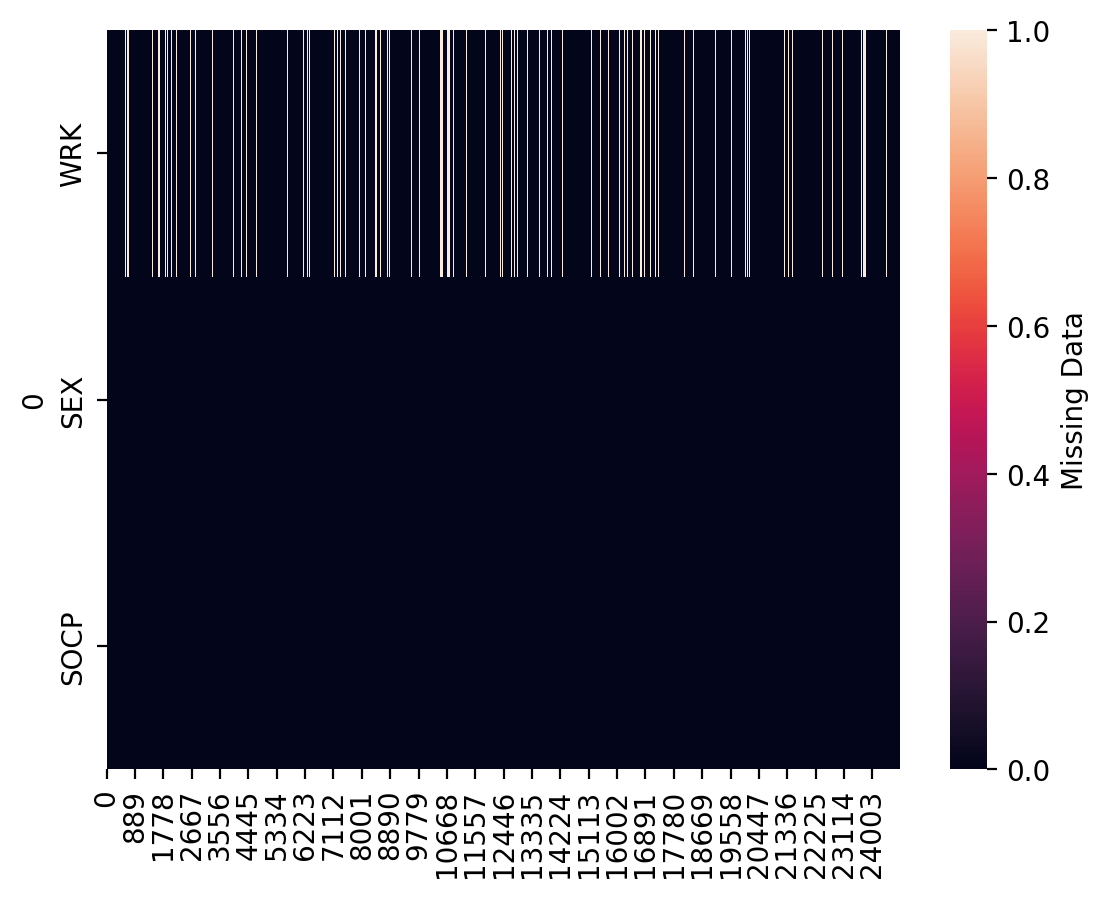

In [62]:
sns.heatmap(cleaned_pums.isna().transpose(),
           cbar_kws={'label':'Missing Data'});

All the white spots in the heat map represent the missing data

## Dropping NA values in the `PUMS` dataset

In [63]:
cleaned_pums = cleaned_pums.dropna()

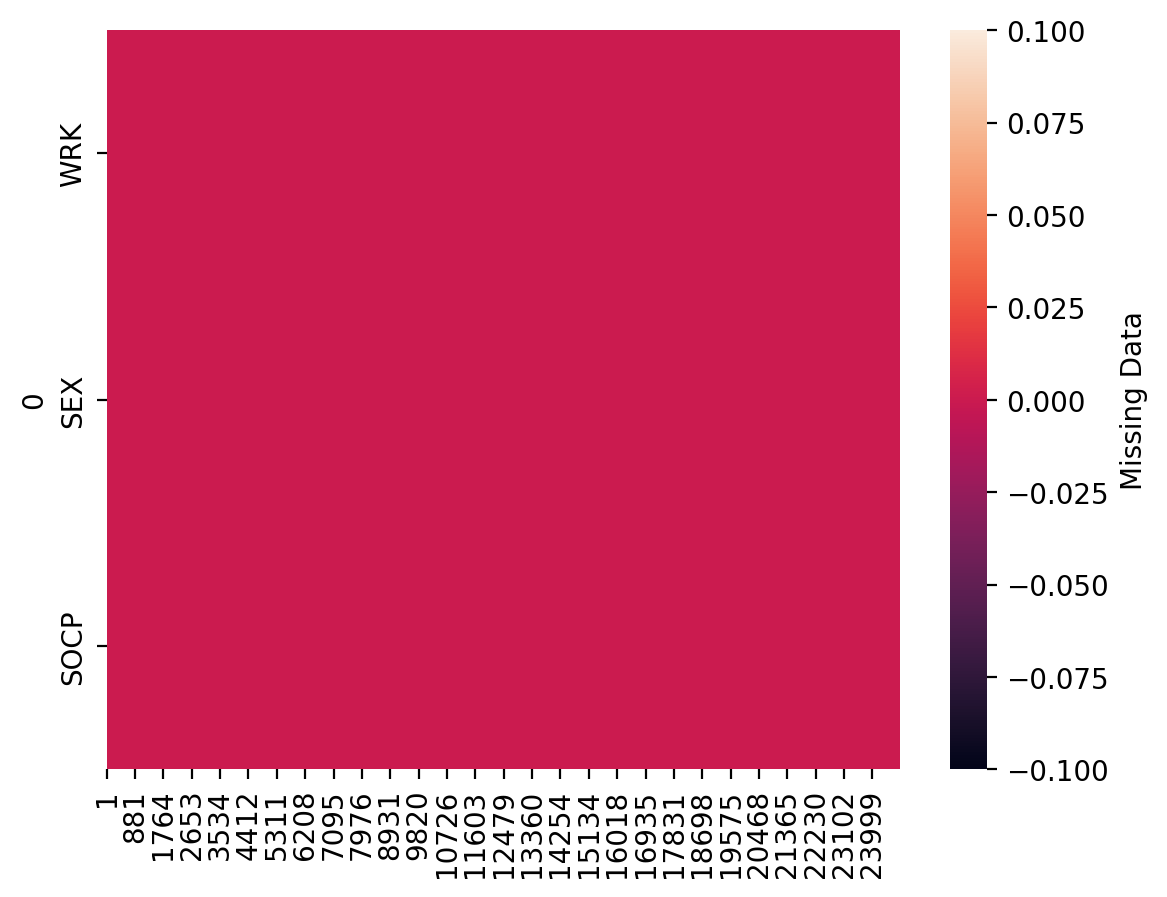

In [65]:
sns.heatmap(cleaned_pums.isna().transpose(),
           cbar_kws={'label' : 'Missing Data'});

All the missing data is gone, the heatmap is no longer in black and white

# Cleaning the `OES` dataset

In [66]:
orig_wage_df.head()

AREA AREA_TITLE  NAICS                              NAICS_TITLE I_GROUP  \
0     1    Alabama     55  Management of Companies and Enterprises  sector   
1     1    Alabama     55  Management of Companies and Enterprises  sector   
2     1    Alabama     55  Management of Companies and Enterprises  sector   
3     1    Alabama     55  Management of Companies and Enterprises  sector   
4     1    Alabama     55  Management of Companies and Enterprises  sector   

  OCC_CODE                        OCC_TITLE   O_GROUP TOT_EMP EMP_PRSE  ...  \
0  00-0000                  All Occupations     total   21920        0  ...   
1  11-0000           Management Occupations     major    4820      4.1  ...   
2  11-1021  General and Operations Managers  detailed    1600        7  ...   
3  11-2021               Marketing Managers  detailed     140     13.6  ...   
4  11-2022                   Sales Managers  detailed     140     14.7  ...   

  H_MEDIAN H_PCT75 H_PCT90 A_PCT10 A_PCT25 A_MEDIAN A_PCT75 A_PCT90 ANNUAL  \
0     35.6   56.94   79.49   35470   47040    74050  118440  165330    NaN   
1    61.13   92.03       #   61600   94020   127140  191420       #    NaN   
2     60.5       #       #   60010   78520   125850       #       #    NaN   
3    61.13   99.23       #   65240   98680   127140  206410       #    NaN   
4    49.56   77.94       #   59390   79010   103080  162110       #    NaN   

  HOURLY  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

[5 rows x 26 columns]

## Making copies of the dataframe

In [67]:
cleaned_wage = orig_wage_df.copy()

## Replacing alphanumeric characters (which represent missing values and outliers) with NaNs

In [68]:
cleaned_wage['H_MEAN'] = cleaned_wage['H_MEAN'].replace({'*': np.nan})
cleaned_wage['H_MEAN'] = cleaned_wage['H_MEAN'].replace({'#' : np.nan})

C:\Users\MrIzzat\AppData\Local\Temp\ipykernel_1920\1778053412.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_wage['H_MEAN'] = cleaned_wage['H_MEAN'].replace({'#' : np.nan})


## Filtering the dataframe based on specific data elements

In [69]:
cleaned_wage = cleaned_wage[['AREA_TITLE','OCC_CODE','OCC_TITLE','H_MEAN']]

## Filter data only related to California

In [70]:
cleaned_wage = cleaned_wage[cleaned_wage['AREA_TITLE'] == 'California']


## Dropping NaN values

In [71]:
cleaned_wage = cleaned_wage.dropna()

## Visually assessing that all values lie within an expected range using a historgram

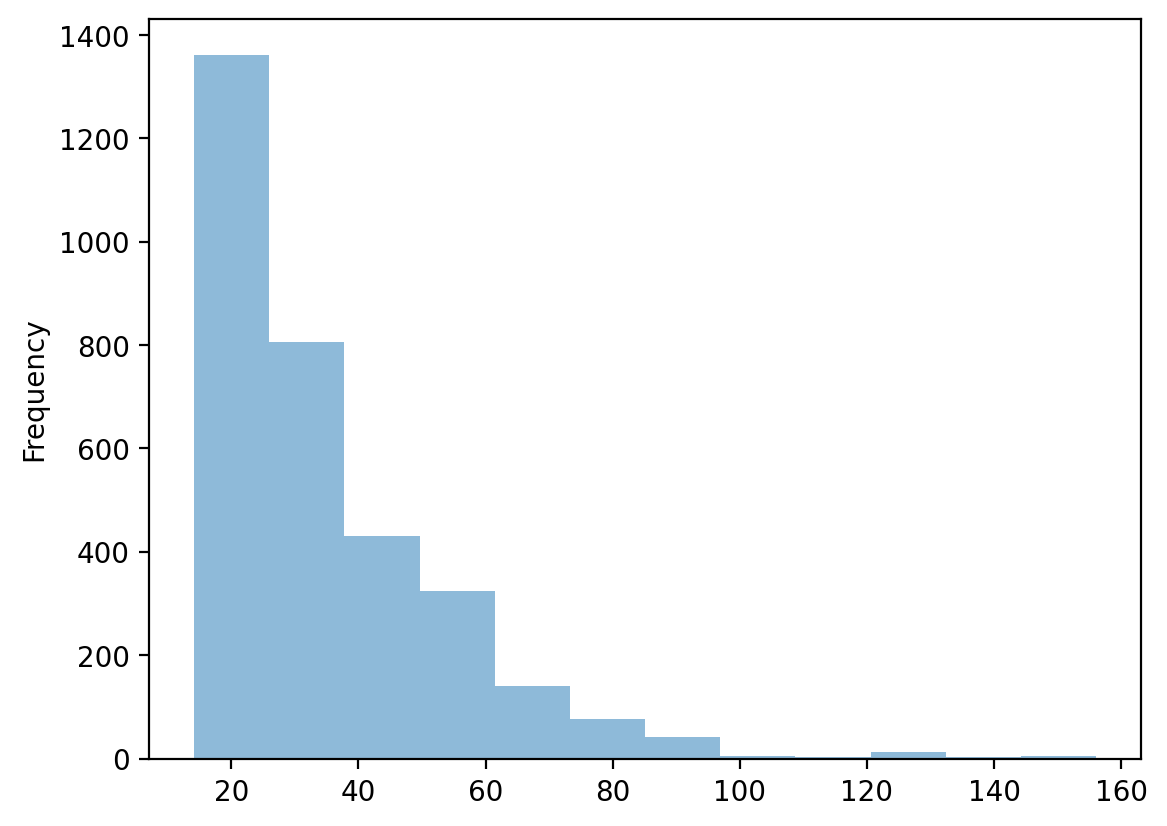

In [73]:
cleaned_wage['H_MEAN'].plot.hist(bins=12,alpha=0.5);

# Programmetic Asserts

The `assert` keyword can be used to ensure the restuls of the cleaning are correct. If something was not cleaned properly, the statement will raise an exception. The test cases can be built based on how the cleaning was done.

In [74]:
cleaned_pums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22353 entries, 1 to 24872
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   WRK     22353 non-null  object
 1   SEX     22353 non-null  object
 2   SOCP    22353 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


## For `PUMS` dataset

### Checking the column data types are accuracte

In [76]:
assert cleaned_pums['WRK'].dtype == 'object'
assert cleaned_pums['SEX'].dtype == 'object'
assert cleaned_pums['SOCP'].dtype == 'object'

### Checking the number of NaN values is 0

In [85]:
assert cleaned_pums.isna().sum().sum() == 0

## For the `OEWS` dataset

### Checking the column data type is accurate

In [86]:
assert cleaned_wage['H_MEAN'].dtype == 'float'

### Checking the number of NaN values is 0

In [88]:
assert cleaned_wage.isna().sum().sum() == 0

### Checking to see if all `H_MEAN`  values are under 150

In [91]:
assert (cleaned_wage['H_MEAN']<= 150).all()

AssertionError: 

In [92]:
cleaned_wage.describe()

H_MEAN
count  3209.000000
mean     34.892412
std      18.858344
min      14.140000
25%      21.220000
50%      29.100000
75%      43.740000
max     156.040000

It failed because there is a value at 156